In [1]:
import pandas as pd

# Load your Titanic dataset
df = pd.read_csv('titanicc.csv')

# Preview the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Data types and null values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [3]:
# Example
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df.dropna(subset=['Embarked'], inplace=True)


C:\Users\KAVIYA VARSHINI S\AppData\Local\Temp\ipykernel_28824\3727677380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\KAVIYA VARSHINI S\AppData\Local\Temp\ipykernel_28824\3727677380.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [4]:
# Handle missing values (updated safe way)
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].mean())

if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')

if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [5]:
print(df.select_dtypes(include='object').columns)


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])


In [8]:
df.drop('Cabin', axis=1, inplace=True)


In [9]:
print(df.head())
print(df.columns)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# List of columns to scale
cols_to_scale = ['Age', 'Fare']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [11]:
print(df[cols_to_scale].describe())


                Age          Fare
count  8.890000e+02  8.890000e+02
mean   3.316932e-16  1.398706e-16
std    1.000563e+00  1.000563e+00
min   -2.255481e+00 -6.462044e-01
25%   -5.904949e-01 -4.872378e-01
50%    3.523727e-03 -3.551972e-01
75%    4.125086e-01 -2.207954e-02
max    3.884444e+00  9.668551e+00


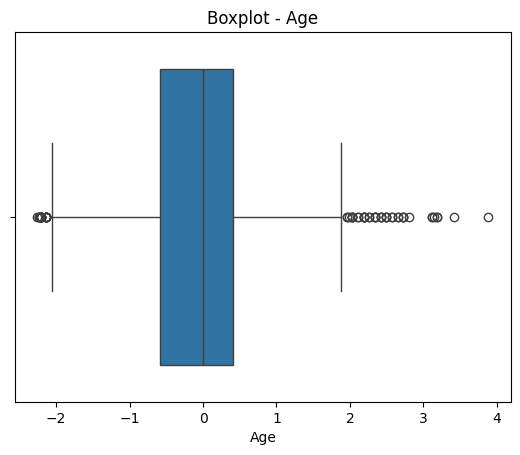

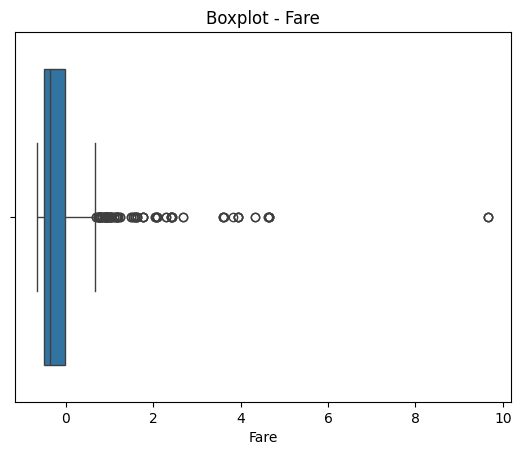

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# For Age
sns.boxplot(x=df['Age'])
plt.title("Boxplot - Age")
plt.show()

# For Fare
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()


In [13]:
# Define a function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to 'Fare' and 'Age'
df = remove_outliers(df, 'Fare')
df = remove_outliers(df, 'Age')


In [14]:
print("Final shape of cleaned dataset:", df.shape)


Final shape of cleaned dataset: (705, 12)
